<a href="https://colab.research.google.com/github/ucfilho/Raianars_paper_one_revisited/blob/main/After_asked_reviews_one_2022/Hybrid_cec2014_D_30/C_Frannk_F28_cec2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz
import Go2Ann
from pandas import read_csv

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight


In [2]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One


In [3]:
#import Go2Ann
#import de_soma_Insight
#import de_bounds_matriz
#import Function
import Go2MinMax
from AvaliaX import AvaliaX
#from Function import FUN
#from Function import Function.FUN
#from Function import Function.Fun
#from Function import Function
from GeraIndices import GeraIndices
import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from scipy import optimize
import pandas as pd
from sklearn.metrics import confusion_matrix

############################### DADOS DE ENTRADA 
RUNS=50 #NÚMERO DE RODADAS
Fc=0.1 # fator de correcao parametros da ANN
its=1 #10 # quantas vezes vai usar o NPAR antes de alterar de novo
ITE=1000 #10 # PONTOS quantas vezes vai alteral NPAR 
NPAR=100
mut=0.5
crossp=0.5

#fator = 1.0/3.0; 
Fi=mut;CRi=crossp;# para impressão
fator = 1.0/3.0; 
mut2=0.5;crossp2=0.5;mut3=0.75;crossp3=0.25;mut4=0.25;crossp4=0.25;


In [4]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [5]:
############################### Importar códigos
!git clone https://github.com/ucfilho/optim_raianars_Insight/ #clonar do Github
%cd optim_raianars_Insight
import de_soma_Insight
import de_bounds_matriz

fatal: destination path 'optim_raianars_Insight' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight


In [6]:
#!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
#%cd Raianars_paper_One

!git clone https://github.com/ucfilho/Raianars_Routines #clonar do Github
%cd Raianars_Routines

fatal: destination path 'Raianars_Routines' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines


In [7]:
!git clone https://github.com/ucfilho/functions_cec2014_data
%cd functions_cec2014_data
import F1_to_F27_cec2014_zero_to_hero
import cec2014_names
import cec2014_shift_rotate

fatal: destination path 'functions_cec2014_data' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data


In [8]:
function_select = 'F28'
problem_size = 30 # possibles 2, 10, 20, 30, 50, 100

In [9]:
dim = problem_size 

In [10]:
if function_select == 'F28':
  hybrid_choice = 'F15'


In [11]:
!pip install --upgrade --no-cache-dir gdown

In [12]:
# !gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
# https://drive.google.com/file/d/1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz/view?usp=sharing
!gdown --id 1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1yM-cGzp7F35bXZ-f80uoJHzGqAb52CPz
To: /content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/cec2014.zip
100% 36.1M/36.1M [00:00<00:00, 262MB/s]


In [13]:
import zipfile
file_name = zipfile.ZipFile('cec2014.zip', 'r')
file_name.extractall()

In [14]:
F_bias = cec2014_names.BiasValue()[hybrid_choice]
type_fun = cec2014_names.TypeFunctions()[hybrid_choice]
Function_CEC2014 =function_select + "_" + cec2014_names.NamesFunctions()[function_select]+"_D_"+str(problem_size)

# block of functions to F28: it use F15
f_matrix = "M_"+hybrid_choice[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+hybrid_choice[1:]+".txt"
shift_data_F15 = load_shift_data__(shift_data_file)[:problem_size]
matrix_F15 = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+hybrid_choice[1:]+"_D"+str(problem_size) + ".txt"
shuffle_F15 = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)

f_matrix = "M_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shift_data_file="shift_data_"+function_select[1:]+".txt"
shift_data = load_shift_data__(shift_data_file)[:problem_size]
matrix = load_matrix_data__(f_matrix)
f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)

f14_expanded_scaffer__ = F1_to_F27_cec2014_zero_to_hero.f14_expanded_scaffer__ 
f9_modified_schwefel__ = F1_to_F27_cec2014_zero_to_hero.f9_modified_schwefel__ 
f11_happy_cat__ = F1_to_F27_cec2014_zero_to_hero.f11_happy_cat__ 
f1_elliptic__ = F1_to_F27_cec2014_zero_to_hero.f1_elliptic__
f13_expanded_griewank__ = F1_to_F27_cec2014_zero_to_hero.f13_expanded_griewank__

def F15_hybrid(solution , shift_data=shift_data_F15 , matrix= matrix_F15, shuffle=shuffle_F15):
    #   "F15":"Shifted and Rotated Expanded Griewank’s plus Rosenbrock’s Function"
    problem_size = len(solution)
    shift_data = shift_data[:problem_size]
    z = 5 * (solution - shift_data) / 100
    z = np.dot(z, matrix) + 1
    return f13_expanded_griewank__(z) 

def F28(solution , shift_data= shift_data , matrix=matrix,shuffle=shuffle):
    problem_size = len(solution)
    xichma = np.array([10, 20, 30, 40, 50])
    lamda = np.array([2.5, 10, 2.5, 5e-4, 1e-6])
    bias = np.array([0, 100, 200, 300, 400])

    # 1. Rotated Expanded Griewank’s plus Rosenbrock’s Function F15’
    t1 = solution - shift_data[0]
    g1 = lamda[0] * F15_hybrid(solution , shift_data_F15 , matrix_F15,shuffle_F15) + bias[0]
    w1 = (1.0 / np.sqrt(sum(t1 ** 2))) * np.exp(-sum(t1 ** 2) / (2 * problem_size * xichma[0] ** 2))

    # 2. Rotated HappyCat Function F13’
    t2 = solution - shift_data[1]
    g2 = lamda[1] * f11_happy_cat__(np.dot(matrix[problem_size:2 * problem_size, :], t2)) + bias[1]
    w2 = (1.0 / np.sqrt(sum(t2 ** 2))) * np.exp(-sum(t2 ** 2) / (2 * problem_size * xichma[1] ** 2))

    # 3. Rotated Schwefel's Function F11’
    t3 = solution - shift_data[2]
    g3 = lamda[2] * f9_modified_schwefel__(np.dot(matrix[2 * problem_size: 3 * problem_size, :], t3)) + bias[2]
    w3 = (1.0 / np.sqrt(sum(t3 ** 2))) * np.exp(-sum(t3 ** 2) / (2 * problem_size * xichma[2] ** 2))

    # 4. Rotated Expanded Scaffer’s F6 Function F16’
    t4 = solution - shift_data[3]
    g4 = lamda[3] * f14_expanded_scaffer__(np.dot(matrix[3 * problem_size: 4 * problem_size, :], t4)) + bias[3]
    w4 = (1.0 / np.sqrt(sum(t4 ** 2))) * np.exp(-sum(t4 ** 2) / (2 * problem_size * xichma[3] ** 2))

    # 5. Rotated High Conditioned Elliptic Function F1’
    t5 = solution - shift_data[4]
    g5 = lamda[4] * f1_elliptic__(np.dot(matrix[4 * problem_size:, :], t5)) + bias[4]
    w5 = (1.0 / np.sqrt(sum(t5 ** 2))) * np.exp(-sum(t5 ** 2) / (2 * problem_size * xichma[4] ** 2))

    sw = sum([w1, w2, w3, w4, w5])
    result = (w1 * g1 + w2 * g2 + w3 * g3 + w4 * g4 + w5 * g5) / sw
    return result #+ f_bias

In [15]:
def load_shift_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values.reshape((-1))

def load_matrix_data__(data_file=None):
    data = read_csv(data_file, delimiter='\s+', index_col=False, header=None)
    return data.values

In [16]:
shift_data_a = load_shift_data__(shift_data_file)[:problem_size]
matrix_a = load_matrix_data__(f_matrix)
if (type_fun == 'hybrid'):
  f_shuffle = "shuffle_data_"+function_select[1:]+"_D"+str(problem_size) + ".txt"
  shuffle = (load_shift_data__(f_shuffle)[:problem_size] - np.ones(problem_size)).astype(int)
else:
  shuffle = matrix_a

In [17]:
if function_select == 'F28':
  Function = F28

In [18]:
SUPPORT_DIMENSION = [2, 10, 20, 30, 50, 100]
SUPPORT_DIMENSION_2 = [10, 20, 30, 50, 100]

#def Fun(solution,shift_data=shift_data_a, matrix=matrix_a, shuffle):#, bias=F_bias):
def CEC2014(solution, shift_data ,  matrix, shuffle):#, bias=F_bias):
  if(type_fun == 'shift_rotate'):
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = Function(z) + F_bias
  elif(type_fun =='hybrid'): # F17 to F22
    z = Shift_Rotate(solution , shift_data , matrix,shuffle)
    result = z + F_bias
 
  return result

In [19]:
 shift_data = shift_data_a
 matrix = matrix_a
 shuffle = shuffle
 def Hybrid(solution):
   resp = CEC2014(solution, shift_data = shift_data_a, matrix = matrix_a, shuffle = shuffle)
   return resp

In [20]:
!git clone https://github.com/ucfilho/Raianars_paper_One #clonar do Github
%cd Raianars_paper_One

fatal: destination path 'Raianars_paper_One' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One


In [21]:
MAX=np.repeat(100,dim)
MIN=np.repeat(-100,dim)

bounds=[]
for k in range(len(MAX)):
  bounds.append((MIN[k],MAX[k]))

In [22]:
!git clone https://github.com/ucfilho/ANN_read_matrix #clonar do Github
%cd ANN_read_matrix

fatal: destination path 'ANN_read_matrix' already exists and is not an empty directory.
/content/optim_raianars_Insight/Raianars_paper_One/optim_raianars_Insight/Raianars_Routines/functions_cec2014_data/Raianars_paper_One/ANN_read_matrix


In [23]:
ANN_F=pd.read_csv('ANN_INSIGHT_Valor_F.csv')

In [24]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [25]:
syn0_F,syn1_F,X_max_F,X_min_F=Go2Ann.GetMatriz(ANN_F)

In [26]:
syn0_CR,syn1_CR,X_max_CR,X_min_CR=Go2Ann.GetMatriz(ANN_CR)

In [27]:
ANN_CR=pd.read_csv('ANN_INSIGHT_CR.csv')

In [28]:
fields = ['DI RELATIVO','FRAC Its','Fo','CRo']

In [29]:
##################################### 

TOTAL=10*dim*its*ITE
TOTAL=int(TOTAL/2)   # CONFERIR SE ESTE EH O MELHOR LUGAR

#dimensions=len(MAX)
dimensions=dim
start_time = time.time() #INICIALIZA CONTAGEM DO TEMPO


PAR=dim
Fun = Function
fobj=Fun

MAX_P=np.zeros(ITE) # ATENCAO para variar F e Cr MAX_P passa a ser 3 vezes maior
MIN_P=np.zeros(ITE) # ATENCAO para variar F e Cr MIN_P passa a ser 3 vezes maior

for i in range(dim):
  MAX_P[i]=MAX[i] 
  MIN_P[i]=MIN[i]

rodadas=1
NPAR1=int(fator*NPAR);
NPAR2=int((NPAR-NPAR1)/3);
NPAR3=int((NPAR-NPAR1)/3);
NPAR4=int((NPAR-NPAR1)/3);
NPAR1 = NPAR-3*NPAR2
print('frac=',fator);
print('Npar1=',NPAR1);
print('Npar2=',NPAR2);
print('Npar3=',NPAR3);
print('Npar4=',NPAR4);
print('Npar=',NPAR)

cols=dim

X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
for i in range(NPAR1):
  for j in range(cols):
    r=np.random.random()
    X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
for i in range(NPAR2):
  for j in range(cols):
    r=np.random.random()
    X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

X3=np.zeros((NPAR3,cols)) # X1 is Frannk population
for i in range(NPAR3):
  for j in range(cols):
    r=np.random.random()
    X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
for i in range(NPAR4):
  for j in range(cols):
    r=np.random.random()
    X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
 ############################################################
  #bounds=[(5*dim, 15*dim)] * PONTOS # ITE
  #bounds=[(3*dim, 12*dim)] * PONTOS # ITE
  #bounds=[(4*dim, 16*dim)] * PONTOS
  
  # nao pode ser assim pq o bounds vale p o DE nao dos parametros
  #p=int(TOTAL/its/ITE) 
  #bounds=[(p, p)] * PONTOS


frac= 0.3333333333333333
Npar1= 34
Npar2= 22
Npar3= 22
Npar4= 22
Npar= 100


In [30]:

start_time = time.time()
BEST_AGENTS=[]
MAT_stat=[]
for iii in range(RUNS):
    MAT=[] 
    mut=Fi
    crossp=CRi
    SOMA=0
    pop = np.random.rand(NPAR, dim)
    diff=np.zeros(PAR)


    X1=np.zeros((NPAR1,cols)) # X1 is Frannk population
    for i in range(NPAR1):
      for j in range(cols):
        r=np.random.random()
        X1[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
        
    X2=np.zeros((NPAR2,cols)) # X2 is population DE (default DE)
    for i in range(NPAR2):
      for j in range(cols):
        r=np.random.random()
        X2[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X3=np.zeros((NPAR3,cols)) # X2 is population DE (default DE)
    for i in range(NPAR3):
      for j in range(cols):
        r=np.random.random()
        X3[i,j]=r*(MAX[j]-MIN[j])+MIN[j]

    X4=np.zeros((NPAR4,cols)) # X2 is population DE (default DE)
    for i in range(NPAR4):
      for j in range(cols):
        r=np.random.random()
        X4[i,j]=r*(MAX[j]-MIN[j])+MIN[j]
    
    DIo=1e99
  
    CRo=crossp;Fo=mut;
    Fitness = np.asarray([Fun(ind, shift_data , matrix, shuffle) for ind in X1])
    XY,BEST_XY,BESTo,FOBESTo=AvaliaX(X1,Fitness)
    nrow,ncol=X1.shape

    QUANT=17;MAT_INDo=np.zeros((1,QUANT)); # quantos indices esta fazendo
    MAT_INDo[0,5]=nrow  # VALOR NP
    MAT_INDo[0,6]=Fo    # VALOR Fo   
    MAT_INDo[0,7]=CRo   # VALOR CRo

    Fuma = f1_elliptic__  # Fuma era Fun
  
    MAT_INDo=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                        syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                        X_min_CR,Fc,fields,Fuma)
  
    DIo=np.copy(MAT_INDo[0,0])
    MAT_INDo[0,15]=Fo    # VALOR Fo   
    MAT_INDo[0,16]=CRo   # VALOR CRo
    #ind_crossp=ITE-1
    

    
    for k in range(ITE):



      X2,BEST2,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut2, crossp2,NPAR2, its,fobj,X2)
      X3,BEST3,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut3, crossp3,NPAR3, its,fobj,X3)
      X4,BEST4,FOBEST,XY,BEST_XY=de_bounds_matriz.de(bounds, mut4, crossp4,NPAR4, its,fobj,X4)
      
      X1,BEST1,FOBEST,XY,BEST_XY,SOMA= de_soma_Insight.de(MAX,MIN, mut, crossp,NPAR1,its,Fun,X1,SOMA,TOTAL)

      MAT_IND=GeraIndices(X1,BESTo,FOBESTo,DIo,MAT_INDo,SOMA,TOTAL,syn0_F,
                          syn1_F,X_max_F,X_min_F,syn0_CR,syn1_CR,X_max_CR,
                          X_min_CR,Fc,fields,Fun)
    
      BESTo=np.copy(BEST1);FOBESTo=np.copy(FOBEST);
      MAT.append(MAT_IND.ravel())
    
      MAT_INDo[0,6]=MAT_IND[0,15]   # VALOR Fo   
      MAT_INDo[0,7]=MAT_IND[0,16]   # VALOR CRo
      mut=MAT_IND[0,15]
      crossp=MAT_IND[0,16]
      X1[0,:] = BEST2;X1[1,:] = BEST3; X1[2,:] = BEST4;X1[NPAR1-1,:] = BEST1;
      X2[0,:] = BEST1;X2[1,:] = BEST3;X2[2,:] = BEST4;X2[NPAR2-1,:] = BEST2;
      X3[0,:] = BEST1;X3[1,:] = BEST2;X3[2,:] = BEST4;X3[NPAR3-1,:] = BEST3;
      X4[0,:] = BEST1;X4[1,:] = BEST2;X4[2,:] = BEST3;X4[NPAR4-1,:] = BEST4;
    print('k=',iii,'time=',(time.time()-start_time)/60, 'FO=',FOBEST)  
    BEST_AGENTS.append(BEST_XY)
    MAT_stat.append(MAT)
    #print("GlobalParam e Solucao:", BEST,"Funcao=",FOBEST)
    
############################## Cálculo dos Parâmetros de Avaliação   
TIME = (time.time() - start_time)/RUNS
BEST_AGENTS=np.array(BEST_AGENTS)
BEST_AGENTS_ST= BEST_AGENTS[BEST_AGENTS[:,-1].argsort()]
BEST=BEST_AGENTS_ST[0]
WORSE=BEST_AGENTS_ST[-1]
MEAN=np.mean(BEST_AGENTS,axis=0)
MAXFO=BEST_AGENTS[:,-1].max()
MINFO=BEST_AGENTS[:,-1].min()
STD=BEST_AGENTS[:,-1].std()

k= 0 time= 7.128760472933451 FO= 10183.814350409255
k= 1 time= 14.009333566824596 FO= 10183.81435057873
k= 2 time= 20.838126822312674 FO= 10183.814372472832
k= 3 time= 27.58201711177826 FO= 10183.814450745269
k= 4 time= 34.33692284822464 FO= 10183.814267170368
k= 5 time= 41.06883586247762 FO= 10183.814418063002
k= 6 time= 47.817876263459524 FO= 10183.814546739357
k= 7 time= 54.55006176630656 FO= 10183.814310408463
k= 8 time= 61.24944738547007 FO= 5439.941070005019
k= 9 time= 67.96870504617691 FO= 10183.83199749334
k= 10 time= 74.53146785100301 FO= 10183.8143720078
k= 11 time= 81.10689086516699 FO= 10183.814578104211
k= 12 time= 87.6730957309405 FO= 10183.814346106423
k= 13 time= 94.23266232013702 FO= 10183.814476641479
k= 14 time= 100.79928410450617 FO= 10183.815612471835
k= 15 time= 107.35788281361262 FO= 10625.558678618905
k= 16 time= 113.86702435811361 FO= 5440.365282847845
k= 17 time= 120.36187622547149 FO= 5459.999503191709
k= 18 time= 126.92362475792567 FO= 10458.020560960886
k= 

In [32]:
NOMES=['DIVERSIDADE (DI)',  'DI RELATIVO','FRAC Its',
           'VELOC FOBJ','VELOC X','NP','Fo','CRo','fmin','fmax',
           'AD_fmin','AD_fmax','DELTA FOBJ','DELTA VX','r_fitness',
           'F','CR']
# BEST_INDEX= BEST_AGENTS[BEST_AGENTS[:,-1].argmin()]  
BEST_INDEX = np.argmin(BEST_AGENTS[:,-1])
df=pd.DataFrame(MAT_stat[BEST_INDEX], columns=NOMES)



In [33]:
pd.set_option('display.max_columns', 30)  
print(df)

     DIVERSIDADE (DI)  DI RELATIVO  FRAC Its  VELOC FOBJ  VELOC X    NP  \
0          310.398704     1.010336  0.000227         0.0      0.0  34.0   
1          303.299659     0.987229  0.000453         1.0      2.0  34.0   
2          299.655180     0.975367  0.000680         0.0      0.0  34.0   
3          297.711493     0.969040  0.000907         1.0      2.0  34.0   
4          291.358832     0.948362  0.001133         1.0      2.0  34.0   
..                ...          ...       ...         ...      ...   ...   
995        126.619610     0.412142  0.225760         1.0      1.0  34.0   
996        126.632152     0.412183  0.225987         1.0      1.0  34.0   
997        126.630554     0.412178  0.226213         1.0      1.0  34.0   
998        126.637678     0.412201  0.226440         1.0      1.0  34.0   
999        126.637723     0.412201  0.226667         1.0      1.0  34.0   

           Fo           CRo          fmin          fmax  AD_fmin  AD_fmax  \
0    0.500000  5.00000

Text(0, 0.5, 'CR')

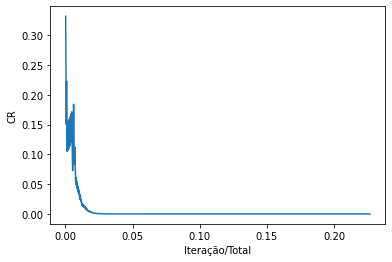

In [34]:
plt.plot(df['FRAC Its'],df['CR'])
plt.xlabel('Iteração/Total')
plt.ylabel('CR')

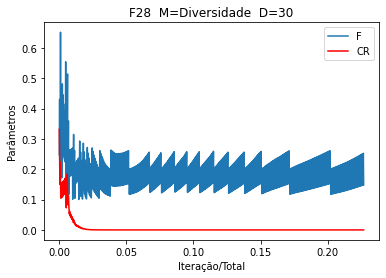

In [35]:

fig, ax = plt.subplots()
ax.plot(df['FRAC Its'],df['F'],label='F')
ax.set_xlabel('Iteração/Total')
ax.set_ylabel('Parâmetros')
ax.plot(df['FRAC Its'],df['CR'],'-r', label='CR')
nome=Fun.__name__+'  M=Diversidade'+ '  D='+str(dim)
ax.set_title(nome)
leg = ax.legend()


Text(0.5, 1.0, 'F28_Diversidade_D=30')

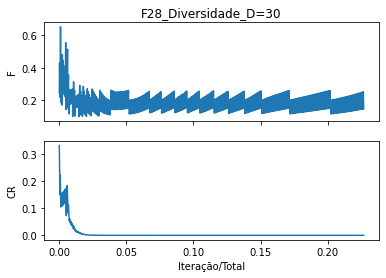

In [36]:
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(df['FRAC Its'],df['F'])
axarr[0].set_ylabel('F')
axarr[1].plot(df['FRAC Its'],df['CR'])
axarr[1].set_ylabel('CR')
axarr[1].set_xlabel('Iteração/Total')
nome=Fun.__name__+'_Diversidade_'+ 'D='+str(dim)
axarr[0].set_title(nome)


In [37]:
nome='SUB'+'_Fo-'+str(Fi)+'_CRo-'+str(CRi)+'_D-'+str(dim)+'_Interv-'+str(ITE)
print('MCS-FRANNK','Fator F/DE= %.2f' %(fator),'NPAR=',NPAR,'Iterações=',ITE*its,'Dim=', PAR,"Min/Max=",MIN[0],"/",MAX[0],'_',Fun.__name__)
print(nome, '\n')
#print('BEST: ',BEST)
#print('MÉDIA: ',MEAN)
print('MÉDIA: ',MEAN[-1],'STD __:',STD)
print('MIN __:',MINFO, 'MAX__: ',MAXFO)
print(MEAN[-1])
print(STD)
print(MINFO)
print("Tempo Médio= %.3f segundos ---" % (TIME))
print(RUNS,'Rodadas') 
print()
print('BEST: ',BEST)
# print('melhor=',BEST_AGENTS[BEST_INDEX])

MCS-FRANNK Fator F/DE= 0.33 NPAR= 100 Iterações= 1000 Dim= 30 Min/Max= -100 / 100 _ F28
SUB_Fo-0.5_CRo-0.5_D-30_Interv-1000 

MÉDIA:  9507.203037681997 STD __: 1679.9945125665456
MIN __: 5432.534202420629 MAX__:  10625.558678618905
9507.203037681997
1679.9945125665456
5432.534202420629
Tempo Médio= 396.179 segundos ---
50 Rodadas

BEST:  [-1.43013575e+01  1.01148705e+01  1.93472556e+01 -1.92643928e+00
 -1.75942210e+00  8.29688582e+00  9.68034486e+00  2.14399123e+01
  7.25924640e+00  1.20011091e+01  2.22595135e+01  1.45350560e+01
  9.60853874e+00  1.34294634e+01 -9.40700106e+00  5.24305547e+00
  1.05699982e+01  1.86521573e+00  2.88068798e+01  2.91192840e+01
  7.91557407e+00  7.90347803e-01  7.40799503e+00  3.22002989e+01
  1.80389877e+01  1.63196860e+01  2.17093808e+01  4.00419837e+01
  3.76097606e+01  1.69804093e+01  5.43253420e+03]
